# DA for AQMS in QLD
### The current version is to wrangle and clean the AQ data from the AQMS in QLD, or AMNS in QLD

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# the location of the data
data_folder = 'C:\\Users\\CHENGG\\Desktop\\IA317900\\data\\'
data_BC, data_MP, data_SG = data_folder + 'BoatCreek\\', data_folder + 'MomerialPark\\', data_folder + 'SouthGladstone\\'
file_BC = 'air-quality-data-boa-2024-10-28-to-2024-11-04.csv'
file_MP = 'air-quality-data-cgm-2024-10-28-to-2024-11-04.csv'
file_SG = 'air-quality-data-qal-2024-10-28-to-2024-11-04.csv'

In [3]:
def qld_amns_wrangler(data):
    df = pd.read_csv(data)
    df.dropna(axis=0,inplace=True)
    # drop any measurement that are non practical
    df = df[df.Measurement >= 0]
    print(f'Here are the items that the station is monitoring : {df.Parameter.unique()}')
    # wrangle the data
    df['Time'] = pd.to_datetime(df['Datetime (UTC)']).dt.tz_convert('Australia/Brisbane')
    df['year'] = df.Time.dt.year
    df['month'] = df.Time.dt.month
    df['day'] = df.Time.dt.day
    df['hour'] = df.Time.dt.hour
    df['date'] = df['Time'].dt.strftime('%Y-%m-%d')
    # need to covert the unit for NO2 from ppm to ug/m3
    try:
        df.loc[df['Parameter'] == 'Nitrogen dioxide', 'Measurement'] = df.loc[df['Parameter'] == 'Nitrogen dioxide', 'Measurement']*1880
        df.loc[df['Parameter'] == 'Nitrogen dioxide', 'Measurement units'] = 'µg/m³'
        print('NOx unit has been changed from ppm to µg/m³')
    except:
        pass
    return df

In [4]:
# load the data
df_bc = qld_amns_wrangler(data_BC+file_BC)
df_mp = qld_amns_wrangler(data_MP+file_MP)
df_sg = qld_amns_wrangler(data_SG+file_SG)

Here are the items that the station is monitoring : ['Nitrogen dioxide' 'Sulfur dioxide' 'Particle PM10' 'Particle PM2.5'
 'Visibility' 'Wind direction' 'Wind speed' 'Temperature']
NOx unit has been changed from ppm to µg/m³
Here are the items that the station is monitoring : ['Nitrogen dioxide' 'Ozone' 'Sulfur dioxide' 'Benzene' 'Toluene' 'Xylene'
 'Formaldehyde']
NOx unit has been changed from ppm to µg/m³
Here are the items that the station is monitoring : ['Nitrogen dioxide' 'Sulfur dioxide' 'Particle PM10' 'Particle PM2.5'
 'Visibility' 'Humidity' 'Temperature' 'Solar radiation' 'Rainfall']
NOx unit has been changed from ppm to µg/m³


In [5]:
df_sg.head(11)

,Station,Datetime (UTC),Parameter,Measurement,Measurement units,Measurement running average,Measurement running average units,Validated,Time,year,month,day,hour,date
0,South Gladstone,2024-11-04T03:00:00.000Z,Nitrogen dioxide,3.76,µg/m³,0.002,ppm (1hr avg),N,2024-11-04 13:00:00+10:00,2024,11,4,13,2024-11-04
1,South Gladstone,2024-11-04T02:00:00.000Z,Nitrogen dioxide,3.76,µg/m³,0.002,ppm (1hr avg),N,2024-11-04 12:00:00+10:00,2024,11,4,12,2024-11-04
2,South Gladstone,2024-11-04T01:00:00.000Z,Nitrogen dioxide,1.88,µg/m³,0.001,ppm (1hr avg),N,2024-11-04 11:00:00+10:00,2024,11,4,11,2024-11-04
3,South Gladstone,2024-11-04T00:00:00.000Z,Nitrogen dioxide,3.76,µg/m³,0.002,ppm (1hr avg),N,2024-11-04 10:00:00+10:00,2024,11,4,10,2024-11-04
4,South Gladstone,2024-11-03T23:00:00.000Z,Nitrogen dioxide,5.64,µg/m³,0.003,ppm (1hr avg),N,2024-11-04 09:00:00+10:00,2024,11,4,9,2024-11-04
5,South Gladstone,2024-11-03T22:00:00.000Z,Nitrogen dioxide,9.40,µg/m³,0.005,ppm (1hr avg),N,2024-11-04 08:00:00+10:00,2024,11,4,8,2024-11-04
6,South Gladstone,2024-11-03T21:00:00.000Z,Nitrogen dioxide,15.04,µg/m³,0.008,ppm (1hr avg),N,2024-11-04 07:00:00+10:00,2024,11,4,7,2024-11-04
7,South Gladstone,2024-11-03T20:00:00.000Z,Nitrogen dioxide,20.68,µg/m³,0.011,ppm (1hr avg),N,2024-11-04 06:00:00+10:00,2024,11,4,6,2024-11-04
8,South Gladstone,2024-11-03T19:00:00.000Z,Nitrogen dioxide,5.64,µg/m³,0.003,ppm (1hr avg),N,2024-11-04 05:00:00+10:00,2024,11,4,5,2024-11-04
9,South Gladstone,2024-11-03T18:00:00.000Z,Nitrogen dioxide,1.88,µg/m³,0.001,ppm (1hr avg),N,2024-11-04 04:00:00+10:00,2024,11,4,4,2024-11-04


In [6]:
df_sg[df_sg.Parameter == 'Nitrogen dioxide'].Measurement.unique()

array([ 3.76,  1.88,  5.64,  9.4 , 15.04, 20.68,  0.  , 11.28,  7.52,
       13.16, 22.56, 16.92, 28.2 , 18.8 , 33.84, 24.44])

### try some plots

> # NOx hourly

In [7]:
FontSize = 18
TickSize = 18

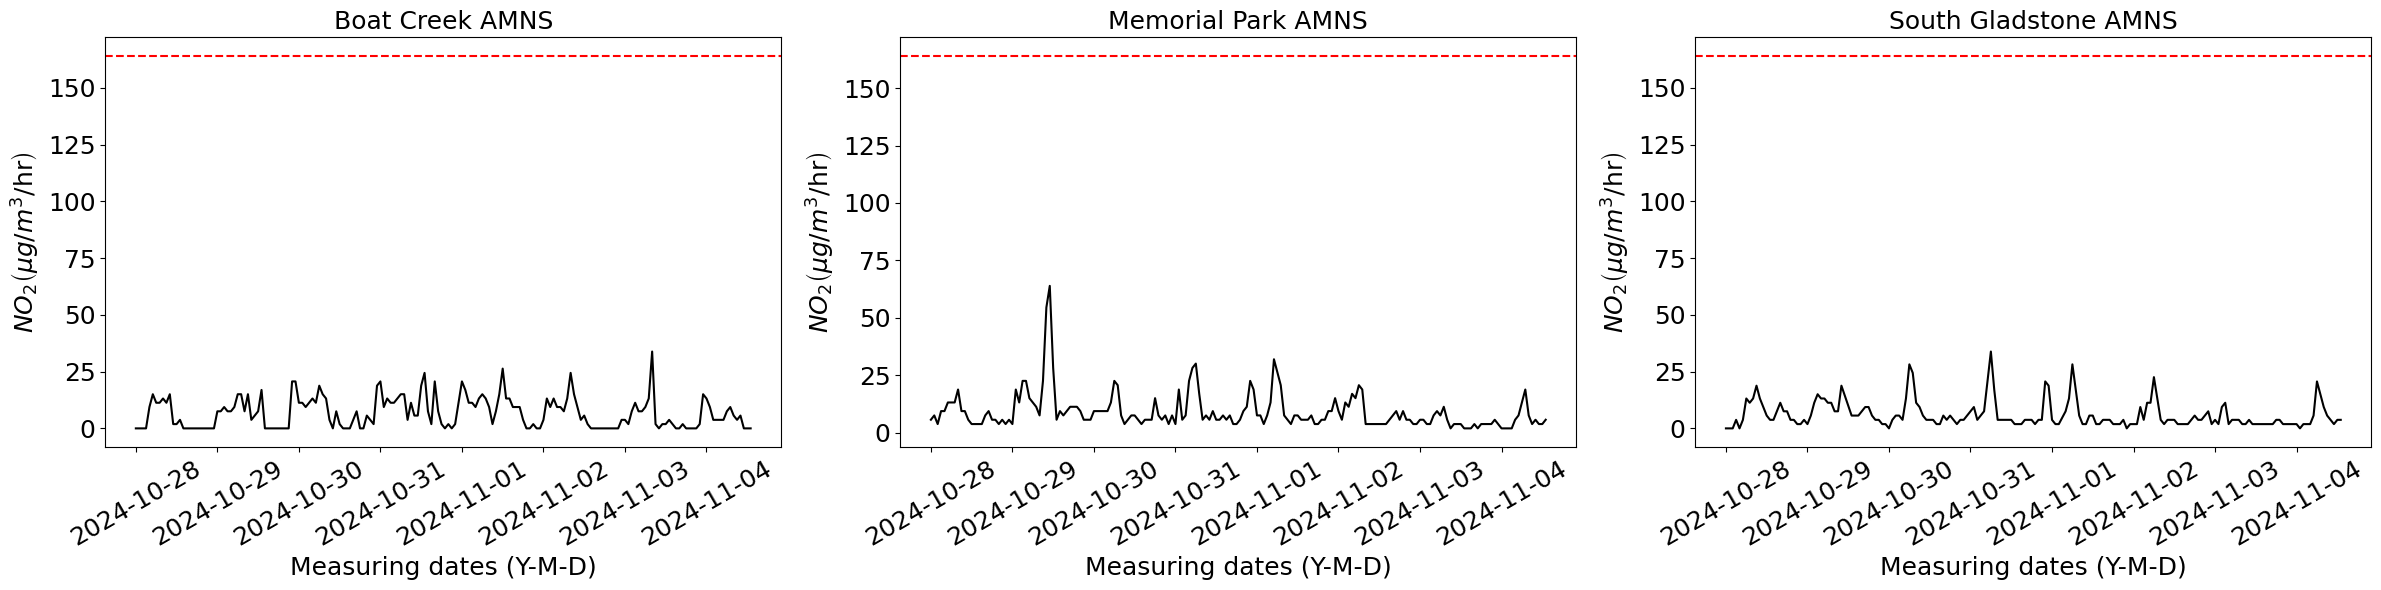

In [8]:
criterion = 164
# plot
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(24, 6))

# Boat Creek
y = df_bc[df_bc.Parameter == 'Nitrogen dioxide'].Measurement
x = df_bc[df_bc.Parameter == 'Nitrogen dioxide'].Time
ax1.plot(x,y,'k-')
ax1.axhline(y=criterion, color='red', linestyle='--', label=f'Criterion: {criterion}')
ax1.set_xlabel('Measuring dates (Y-M-D)', fontsize=FontSize)
ax1.set_ylabel(r'$NO_2 \left(\mu g/m^3/\text{hr}\right)$', fontsize=FontSize)
ax1.tick_params(axis='x', rotation=30, labelsize=TickSize)
ax1.tick_params(axis='y', labelsize=TickSize)
ax1.set_title('Boat Creek AMNS', fontsize=TickSize)

# Memorial Park
y = df_mp[df_mp.Parameter == 'Nitrogen dioxide'].Measurement
x = df_mp[df_mp.Parameter == 'Nitrogen dioxide'].Time
ax2.plot(x,y,'k-')
ax2.axhline(y=criterion, color='red', linestyle='--', label=f'Criterion: {criterion}')
ax2.set_xlabel('Measuring dates (Y-M-D)', fontsize=FontSize)
ax2.set_ylabel(r'$NO_2 \left(\mu g/m^3/\text{hr}\right)$', fontsize=FontSize)
ax2.tick_params(axis='x', rotation=30, labelsize=TickSize)
ax2.tick_params(axis='y', labelsize=TickSize)
ax2.set_title('Memorial Park AMNS', fontsize=TickSize)

# South Gladstone
y = df_sg[df_sg.Parameter == 'Nitrogen dioxide'].Measurement
x = df_sg[df_sg.Parameter == 'Nitrogen dioxide'].Time
ax3.plot(x,y,'k-')
ax3.axhline(y=criterion, color='red', linestyle='--', label=f'Criterion: {criterion}')
ax3.set_xlabel('Measuring dates (Y-M-D)', fontsize=FontSize)
ax3.set_ylabel(r'$NO_2 \left(\mu g/m^3/\text{hr}\right)$', fontsize=FontSize)
ax3.tick_params(axis='x', rotation=30, labelsize=TickSize)
ax3.tick_params(axis='y', labelsize=TickSize)
ax3.set_title('South Gladstone AMNS', fontsize=TickSize)

# plot
plt.tight_layout()
plt.show()

In [25]:
df_bc[df_bc.Parameter == 'Nitrogen dioxide'].Measurement.max()

np.float64(33.839999999999996)

In [26]:
df_mp[df_mp.Parameter == 'Nitrogen dioxide'].Measurement.max()

np.float64(63.92)

In [27]:
df_sg[df_sg.Parameter == 'Nitrogen dioxide'].Measurement.max()

np.float64(33.839999999999996)

> # get some 24hr average data

> # 24hr average data for PM10

In [9]:
df_24 = df_bc[df_bc.Parameter == 'Particle PM10'].groupby('date')['Measurement'].mean().reset_index()
df_24.head()

,date,Measurement
0,2024-10-28,20.339130
1,2024-10-29,14.325000
2,2024-10-30,13.879167
3,2024-10-31,15.879167
4,2024-11-01,21.458333


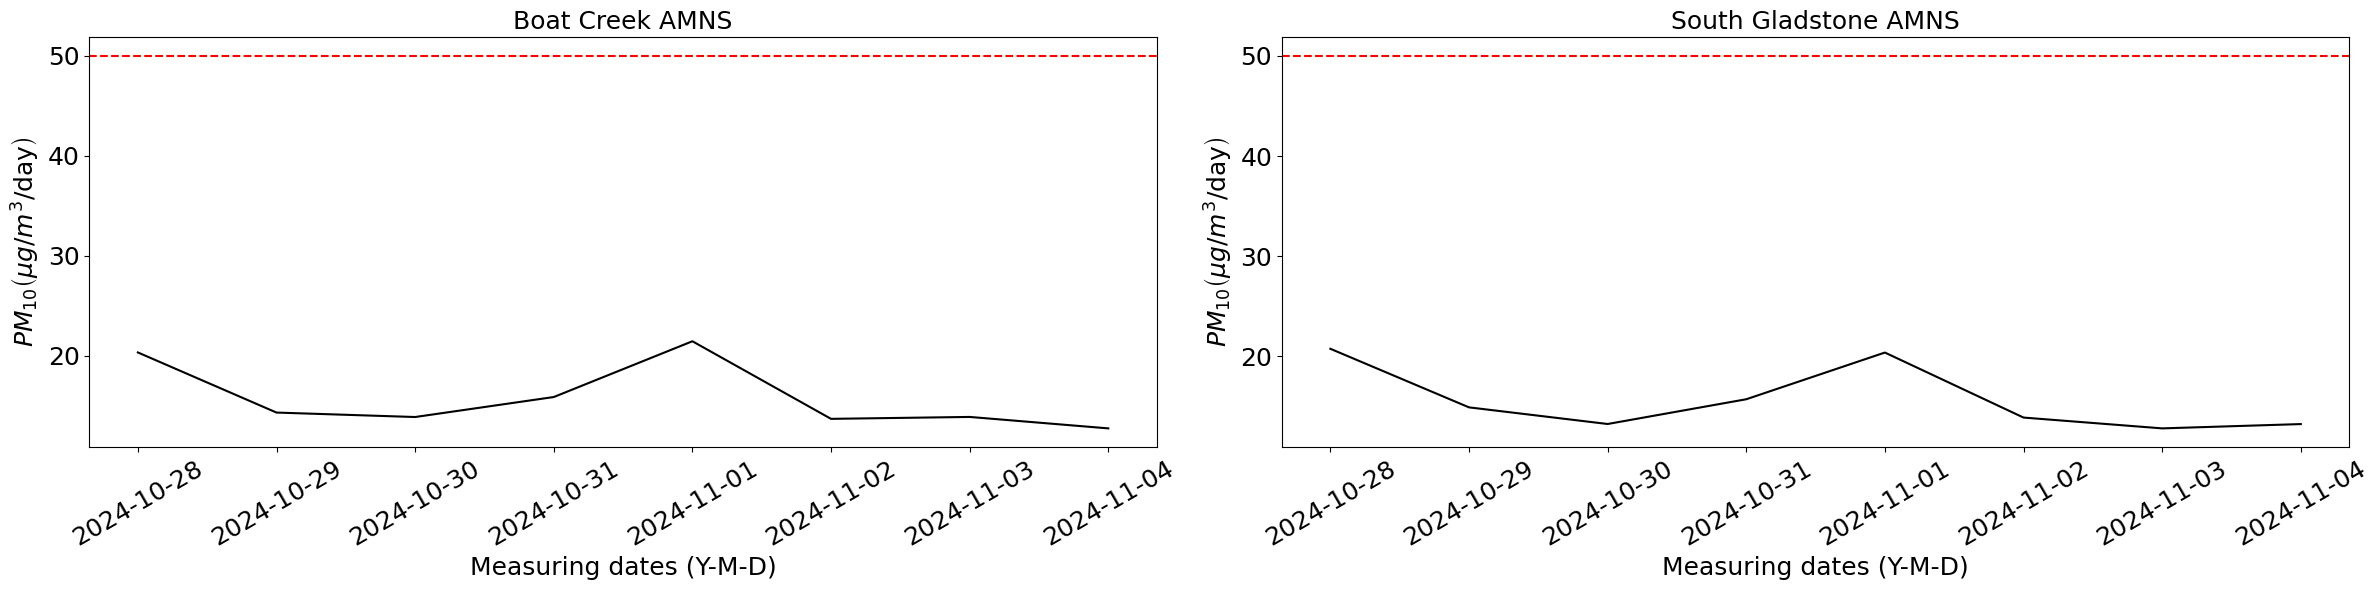

In [10]:
criterion = 50
# plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 6))

# Boat Creek
df_24 = df_bc[df_bc.Parameter == 'Particle PM10'].groupby('date')['Measurement'].mean().reset_index()
y = df_24.Measurement
x = df_24.date
ax1.plot(x,y,'k-')
ax1.axhline(y=criterion, color='red', linestyle='--', label=f'Criterion: {criterion}')
ax1.set_xlabel('Measuring dates (Y-M-D)', fontsize=FontSize)
ax1.set_ylabel(r'$PM_{10} \left(\mu g/m^3/\text{day}\right)$', fontsize=FontSize)
ax1.tick_params(axis='x', rotation=30, labelsize=TickSize)
ax1.tick_params(axis='y', labelsize=TickSize)
ax1.set_title('Boat Creek AMNS', fontsize=TickSize)
print(f'Boat Creek PM10 24hr max is {x.max()}')

# South Gladstone
df_24 = df_sg[df_sg.Parameter == 'Particle PM10'].groupby('date')['Measurement'].mean().reset_index()
y = df_24.Measurement
x = df_24.date
ax2.plot(x,y,'k-')
ax2.axhline(y=criterion, color='red', linestyle='--', label=f'Criterion: {criterion}')
ax2.set_xlabel('Measuring dates (Y-M-D)', fontsize=FontSize)
ax2.set_ylabel(r'$PM_{10} \left(\mu g/m^3/\text{day}\right)$', fontsize=FontSize)
ax2.tick_params(axis='x', rotation=30, labelsize=TickSize)
ax2.tick_params(axis='y', labelsize=TickSize)
ax2.set_title('South Gladstone AMNS', fontsize=TickSize)

# plot
plt.tight_layout()
plt.show()

> # 24 Hr PM2.5

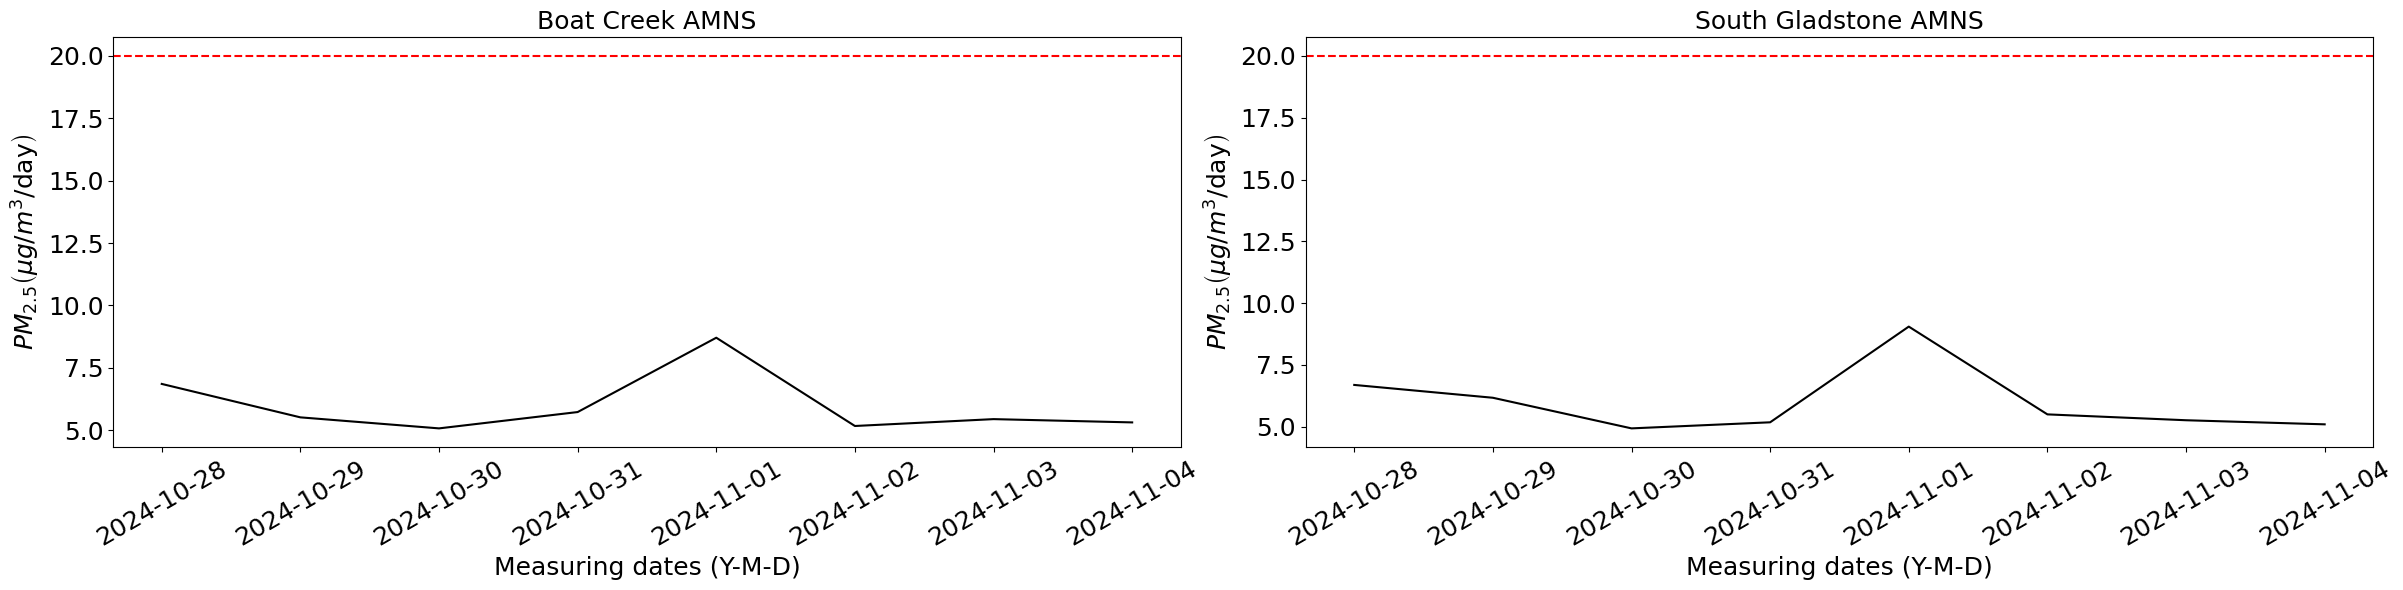

In [11]:
criterion = 20
# plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 6))

# Boat Creek
df_24 = df_bc[df_bc.Parameter == 'Particle PM2.5'].groupby('date')['Measurement'].mean().reset_index()
y = df_24.Measurement
x = df_24.date
ax1.plot(x,y,'k-')
ax1.axhline(y=criterion, color='red', linestyle='--', label=f'Criterion: {criterion}')
ax1.set_xlabel('Measuring dates (Y-M-D)', fontsize=FontSize)
ax1.set_ylabel(r'$PM_{2.5} \left(\mu g/m^3/\text{day}\right)$', fontsize=FontSize)
ax1.tick_params(axis='x', rotation=30, labelsize=TickSize)
ax1.tick_params(axis='y', labelsize=TickSize)
ax1.set_title('Boat Creek AMNS', fontsize=TickSize)

# South Gladstone
df_24 = df_sg[df_sg.Parameter == 'Particle PM2.5'].groupby('date')['Measurement'].mean().reset_index()
y = df_24.Measurement
x = df_24.date
ax2.plot(x,y,'k-')
ax2.axhline(y=criterion, color='red', linestyle='--', label=f'Criterion: {criterion}')
ax2.set_xlabel('Measuring dates (Y-M-D)', fontsize=FontSize)
ax2.set_ylabel(r'$PM_{2.5} \left(\mu g/m^3/\text{day}\right)$', fontsize=FontSize)
ax2.tick_params(axis='x', rotation=30, labelsize=TickSize)
ax2.tick_params(axis='y', labelsize=TickSize)
ax2.set_title('South Gladstone AMNS', fontsize=TickSize)


# plot
plt.tight_layout()
plt.show()

> # to plot the hourly rolling average

In [12]:
df_bc.head()

,Station,Datetime (UTC),Parameter,Measurement,Measurement units,Measurement running average,Measurement running average units,Validated,Time,year,month,day,hour,date
0,Boat Creek,2024-11-04T03:00:00.000Z,Nitrogen dioxide,0.00,µg/m³,0.000,ppm (1hr avg),N,2024-11-04 13:00:00+10:00,2024,11,4,13,2024-11-04
1,Boat Creek,2024-11-04T02:00:00.000Z,Nitrogen dioxide,0.00,µg/m³,0.000,ppm (1hr avg),N,2024-11-04 12:00:00+10:00,2024,11,4,12,2024-11-04
2,Boat Creek,2024-11-04T01:00:00.000Z,Nitrogen dioxide,0.00,µg/m³,0.000,ppm (1hr avg),N,2024-11-04 11:00:00+10:00,2024,11,4,11,2024-11-04
3,Boat Creek,2024-11-04T00:00:00.000Z,Nitrogen dioxide,5.64,µg/m³,0.003,ppm (1hr avg),N,2024-11-04 10:00:00+10:00,2024,11,4,10,2024-11-04
4,Boat Creek,2024-11-03T23:00:00.000Z,Nitrogen dioxide,3.76,µg/m³,0.002,ppm (1hr avg),N,2024-11-04 09:00:00+10:00,2024,11,4,9,2024-11-04


In [13]:
def rolling_avg_24hr(df):
    if len(df.Parameter.unique()) != 1:
        print('There should be only one item per calculation')
    else:
        df_roll = df.set_index('Time')
        df_roll.sort_index(inplace=True)
        df_roll.rename(columns={'Measurement':'rolling_24hr'}, inplace=True)
        rolling24 = df_roll.rolling_24hr.rolling(window='24H').mean()
        # merge the Series back to the dataframe
        df_roll = df.merge(rolling24, how='inner', on='Time')
        return df_roll

> ### PM10 rolling

In [14]:
bc_roll_24 = rolling_avg_24hr(df_bc[df_bc.Parameter == 'Particle PM10'])
sg_roll_24 = rolling_avg_24hr(df_sg[df_sg.Parameter == 'Particle PM10'])

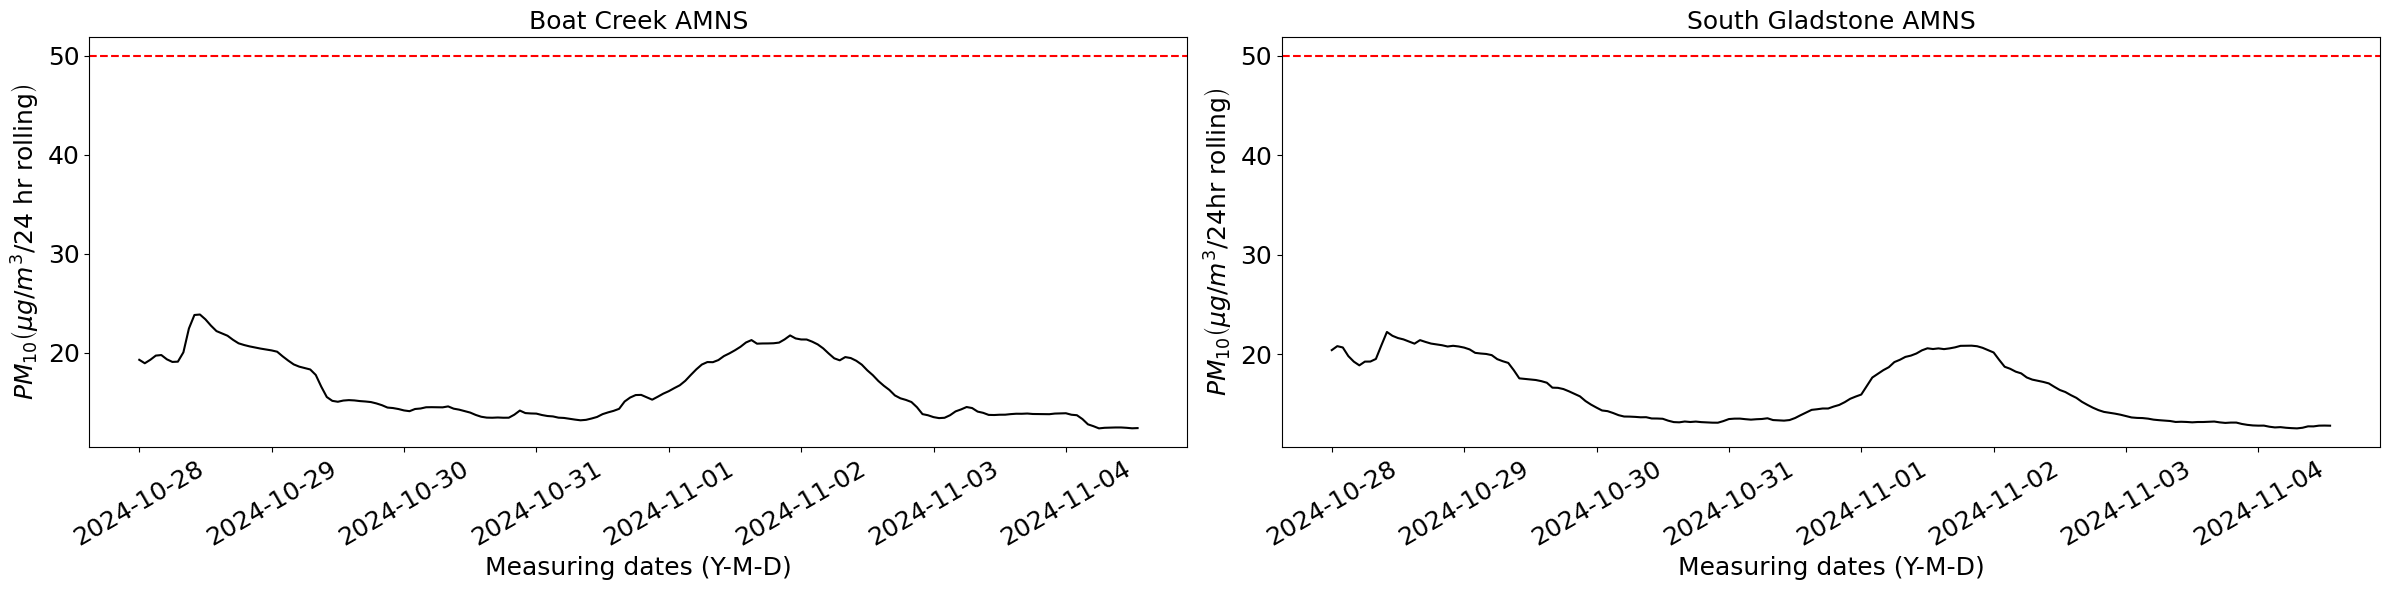

In [15]:
criterion = 50
# plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 6))

# Boat Creek
df_24 = bc_roll_24
y = df_24.rolling_24hr
x = df_24.Time
ax1.plot(x,y,'k-')
ax1.axhline(y=criterion, color='red', linestyle='--', label=f'Criterion: {criterion}')
ax1.set_xlabel('Measuring dates (Y-M-D)', fontsize=FontSize)
ax1.set_ylabel(r'$PM_{10} \left(\mu g/m^3/\text{24 hr rolling}\right)$', fontsize=FontSize)
ax1.tick_params(axis='x', rotation=30, labelsize=TickSize)
ax1.tick_params(axis='y', labelsize=TickSize)
ax1.set_title('Boat Creek AMNS', fontsize=TickSize)

# South Gladstone
df_24 = sg_roll_24
y = df_24.rolling_24hr
x = df_24.Time
ax2.plot(x,y,'k-')
ax2.axhline(y=criterion, color='red', linestyle='--', label=f'Criterion: {criterion}')
ax2.set_xlabel('Measuring dates (Y-M-D)', fontsize=FontSize)
ax2.set_ylabel(r'$PM_{10} \left(\mu g/m^3/\text{24hr rolling}\right)$', fontsize=FontSize)
ax2.tick_params(axis='x', rotation=30, labelsize=TickSize)
ax2.tick_params(axis='y', labelsize=TickSize)
ax2.set_title('South Gladstone AMNS', fontsize=TickSize)

# plot
plt.tight_layout()
plt.show()

> ### PM2.5 rolling

In [16]:
bc_roll_24 = rolling_avg_24hr(df_bc[df_bc.Parameter == 'Particle PM2.5'])
sg_roll_24 = rolling_avg_24hr(df_sg[df_sg.Parameter == 'Particle PM2.5'])

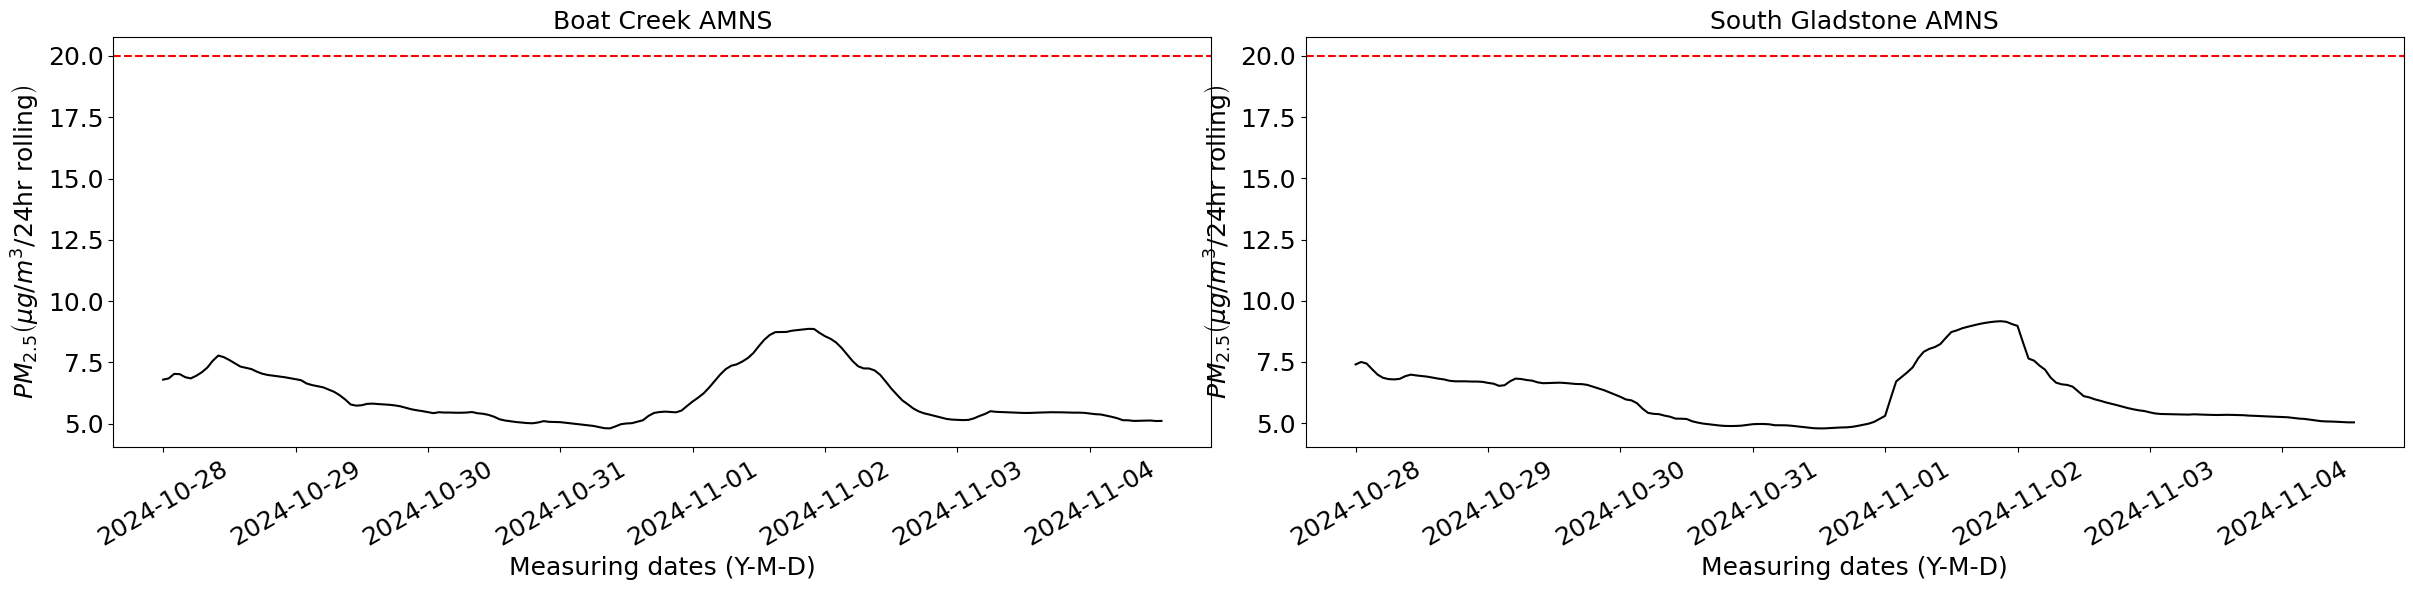

In [17]:
criterion = 20
# plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 6))

# Boat Creek
df_24 = bc_roll_24
y = df_24.rolling_24hr
x = df_24.Time
ax1.plot(x,y,'k-')
ax1.axhline(y=criterion, color='red', linestyle='--', label=f'Criterion: {criterion}')
ax1.set_xlabel('Measuring dates (Y-M-D)', fontsize=FontSize)
ax1.set_ylabel(r'$PM_{2.5} \left(\mu g/m^3/\text{24hr rolling}\right)$', fontsize=FontSize)
ax1.tick_params(axis='x', rotation=30, labelsize=TickSize)
ax1.tick_params(axis='y', labelsize=TickSize)
ax1.set_title('Boat Creek AMNS', fontsize=TickSize)

# South Gladstone
df_24 = sg_roll_24
y = df_24.rolling_24hr
x = df_24.Time
ax2.plot(x,y,'k-')
ax2.axhline(y=criterion, color='red', linestyle='--', label=f'Criterion: {criterion}')
ax2.set_xlabel('Measuring dates (Y-M-D)', fontsize=FontSize)
ax2.set_ylabel(r'$PM_{2.5} \left(\mu g/m^3/\text{24hr rolling}\right)$', fontsize=FontSize)
ax2.tick_params(axis='x', rotation=30, labelsize=TickSize)
ax2.tick_params(axis='y', labelsize=TickSize)
ax2.set_title('South Gladstone AMNS', fontsize=TickSize)


# plot
plt.tight_layout()
plt.show()

> ## now to check the yearly concentration level

> PM10

In [18]:
df_bc.head()

,Station,Datetime (UTC),Parameter,Measurement,Measurement units,Measurement running average,Measurement running average units,Validated,Time,year,month,day,hour,date
0,Boat Creek,2024-11-04T03:00:00.000Z,Nitrogen dioxide,0.00,µg/m³,0.000,ppm (1hr avg),N,2024-11-04 13:00:00+10:00,2024,11,4,13,2024-11-04
1,Boat Creek,2024-11-04T02:00:00.000Z,Nitrogen dioxide,0.00,µg/m³,0.000,ppm (1hr avg),N,2024-11-04 12:00:00+10:00,2024,11,4,12,2024-11-04
2,Boat Creek,2024-11-04T01:00:00.000Z,Nitrogen dioxide,0.00,µg/m³,0.000,ppm (1hr avg),N,2024-11-04 11:00:00+10:00,2024,11,4,11,2024-11-04
3,Boat Creek,2024-11-04T00:00:00.000Z,Nitrogen dioxide,5.64,µg/m³,0.003,ppm (1hr avg),N,2024-11-04 10:00:00+10:00,2024,11,4,10,2024-11-04
4,Boat Creek,2024-11-03T23:00:00.000Z,Nitrogen dioxide,3.76,µg/m³,0.002,ppm (1hr avg),N,2024-11-04 09:00:00+10:00,2024,11,4,9,2024-11-04


In [19]:
df_bc_year = df_bc.groupby(['year', 'Parameter'])['Measurement'].mean().reset_index()
df_mp_year = df_mp.groupby(['year', 'Parameter'])['Measurement'].mean().reset_index()
df_sg_year = df_sg.groupby(['year', 'Parameter'])['Measurement'].mean().reset_index()

In [20]:
df_bc_year

,year,Parameter,Measurement
0,2024,Nitrogen dioxide,6.865635
1,2024,Particle PM10,15.918232
2,2024,Particle PM2.5,6.008840
3,2024,Sulfur dioxide,0.000166
4,2024,Temperature,23.907143
5,2024,Visibility,15.110497
6,2024,Wind direction,163.802198
7,2024,Wind speed,1.900549


In [21]:
df_mp_year

,year,Parameter,Measurement
0,2024,Benzene,1.453846
1,2024,Formaldehyde,6.876923
2,2024,Nitrogen dioxide,9.121099
3,2024,Ozone,0.026132
4,2024,Sulfur dioxide,0.001038
5,2024,Toluene,3.322527
6,2024,Xylene,0.150000


In [22]:
df_sg_year

,year,Parameter,Measurement
0,2024,Humidity,71.261326
1,2024,Nitrogen dioxide,6.028603
2,2024,Particle PM10,15.743575
3,2024,Particle PM2.5,6.012291
4,2024,Rainfall,0.000000
5,2024,Solar radiation,312.243094
6,2024,Sulfur dioxide,0.000408
7,2024,Temperature,24.506630
8,2024,Visibility,13.307263
